In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

walmart_link = 'project/'

walmart_train = pd.read_csv(walmart_link + 'train_wall.csv')
walmart_features = pd.read_csv(walmart_link + 'features.csv')

walmart_data = pd.merge(walmart_train, walmart_features, how = 'left', on = ['Store','Date','IsHoliday'])


In [2]:
walmart_data['MarkDown1'] = walmart_data['MarkDown1'].replace(np.nan,0)
walmart_data['MarkDown2'] = walmart_data['MarkDown1'].replace(np.nan,0)
walmart_data['MarkDown3'] = walmart_data['MarkDown1'].replace(np.nan,0)
walmart_data['MarkDown4'] = walmart_data['MarkDown1'].replace(np.nan,0)
walmart_data['MarkDown5'] = walmart_data['MarkDown1'].replace(np.nan,0)

In [3]:
walmart_data.loc[walmart_data['MarkDown1'] > 0, 'MarkDown1'] = 1
walmart_data.loc[walmart_data['MarkDown1'] <= 0, 'MarkDown1'] = 0
walmart_data.loc[walmart_data['MarkDown2'] > 0, 'MarkDown2'] = 1
walmart_data.loc[walmart_data['MarkDown2'] <= 0, 'MarkDown2'] = 0
walmart_data.loc[walmart_data['MarkDown3'] > 0, 'MarkDown3'] = 1
walmart_data.loc[walmart_data['MarkDown3'] <= 0, 'MarkDown3'] = 0
walmart_data.loc[walmart_data['MarkDown4'] > 0, 'MarkDown4'] = 1
walmart_data.loc[walmart_data['MarkDown4'] <= 0, 'MarkDown4'] = 0
walmart_data.loc[walmart_data['MarkDown5'] > 0, 'MarkDown5'] = 1
walmart_data.loc[walmart_data['MarkDown5'] <= 0, 'MarkDown5'] = 0

In [4]:
walmart_data.isnull().values.any()

False

In [5]:
walmart_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [6]:
x = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in walmart_data.Date]

In [13]:
plt.plot(walmart_data['Date'], walmart_data['Weekly_Sales']) 
plt.show()

ValueError: invalid literal for float(): 0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
5         2010-03-12
6         2010-03-19
7         2010-03-26
8         2010-04-02
9         2

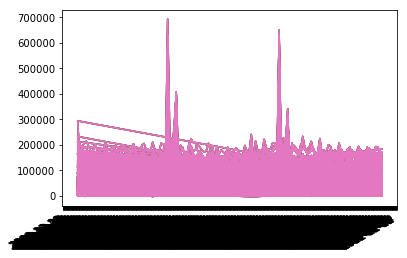

In [30]:
import matplotlib.dates as mdates
locator = mdates.DayLocator()
locator.MAXTICKS = 10000
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(locator)
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

In [7]:
y = walmart_data.Weekly_Sales

In [8]:
walmart_data['Promo'] = 0
walmart_data.loc[(walmart_data['MarkDown1'] == 1) | (walmart_data['MarkDown2'] == 1) | (walmart_data['MarkDown3'] == 1) | (walmart_data['MarkDown4'] == 1) | (walmart_data['MarkDown5'] == 1), 'Promo'] = 1

In [9]:
x = walmart_data.Promo.unique()

In [10]:
y = [0,0]
y[0] = sum(walmart_data.loc[walmart_data['Promo'] == 0,'Weekly_Sales'])


In [11]:
y[1] = sum(walmart_data.loc[walmart_data['Promo'] == 1,'Weekly_Sales'])

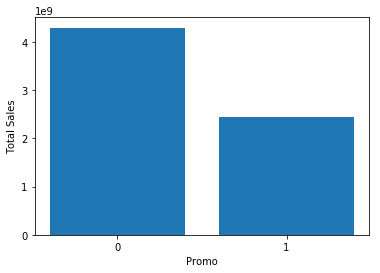

In [56]:
plt.bar(x,y)
plt.xticks(x, ('0', '1'))
plt.xlabel('Promo')
plt.ylabel('Total Sales')
plt.show()

In [20]:
promo_yes = [0]*45
promo_no = [0]*45
n = walmart_data.Store.unique()
for i in n:
    promo_no[i-1] = sum(walmart_data.loc[(walmart_data['Store'] == i) & (walmart_data['Promo'] == 0),'Weekly_Sales'])
    promo_yes[i-1] = sum(walmart_data.loc[(walmart_data['Store'] == i) & (walmart_data['Promo'] == 1),'Weekly_Sales'])

print(promo_yes)


[82402395.979999736, 99711219.479999855, 21801774.740000021, 113367713.63, 17227966.070000004, 81494750.73999992, 31254100.800000124, 47760719.280000001, 29329884.970000058, 97595590.790000066, 71109655.630000055, 53276182.840000063, 106499805.59999985, 96668888.270000353, 31230977.499999981, 27209709.290000007, 48359471.289999992, 55646070.560000092, 73036978.680000156, 110380185.59, 37872964.490000017, 53026432.180000022, 72976732.679999888, 69692820.579999849, 36820939.170000002, 52136799.469999999, 88366059.2700001, 67247730.860000029, 27712049.570000093, 21365138.720000014, 72646852.370000049, 61543402.5200001, 12945159.910000004, 50807089.600000061, 44095776.590000048, 15234874.539999999, 24681305.980000038, 21841231.500000026, 80689719.699999943, 50273000.98999995, 69378373.370000005, 27883394.119999997, 31938920.020000048, 16045743.559999995, 40779654.119999886]


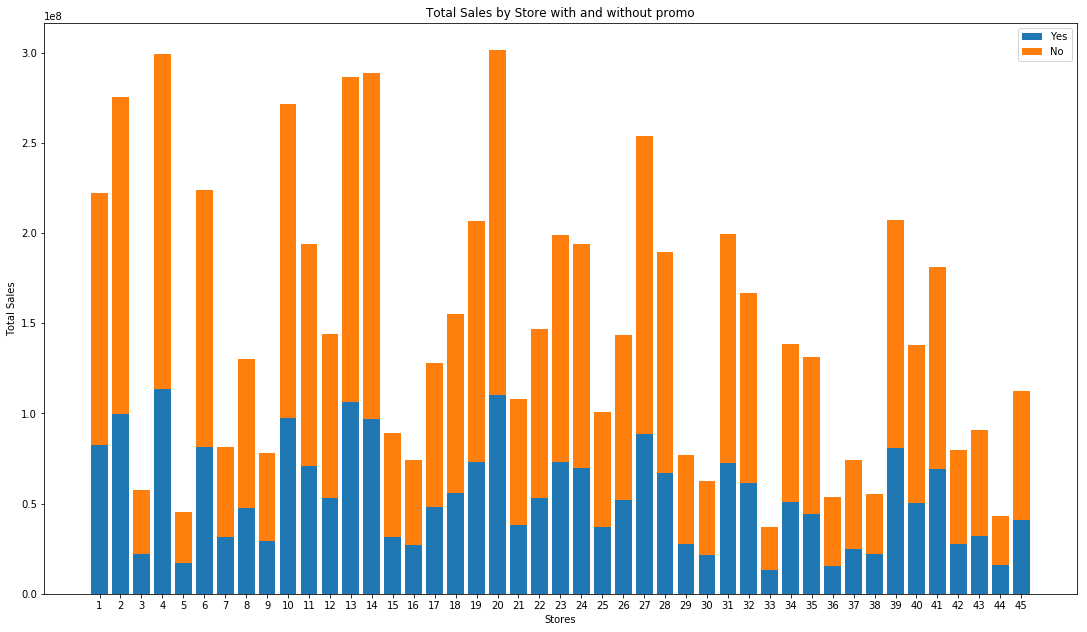

In [72]:
# the width of the bars: can also be len(x) sequence

p1 = plt.bar(n, promo_yes)
p2 = plt.bar(n, promo_no, bottom=promo_yes)

plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store with and without promo')
plt.xticks(n, (range(1,46)))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [26]:
Isholiday_true = [0]*45
Isholiday_false = [0]*45
n = walmart_data.Store.unique()
# n=range(1,50)
for i in n:
    Isholiday_false[i-1] = sum(walmart_data.loc[(walmart_data['Store'] == i) & (walmart_data['IsHoliday'] == False),'Weekly_Sales'])
    Isholiday_true[i-1] = sum(walmart_data.loc[(walmart_data['Store'] == i) & (walmart_data['IsHoliday'] == True),'Weekly_Sales'])
print(Isholiday_true)
p1 = plt.bar(n, Isholiday_true)
p2 = plt.bar(n, Isholiday_false, bottom=Isholiday_true)


plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store with and without promo')
plt.xticks(n, (range(1,46)))
plt.legend((p1[0], p2[0]), ('True', 'False'))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

IndexError: list assignment index out of range